# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane tested the most mice of all the drugs tested. 
- Capomulin and Ramicane had the lowest mean and median tumor volumes. 
- There is a strong positve correlation between a mouse's average weight and a mouse's tumor volume. 
- More male mice were tested than female mice. 
- Of the four drug regimen's that were individually analyzed, Ceftamin had the largest interquartile range and Capomulin had the smallest. Infubinol was the only drug regimen of the four to have an outlier in the dataset. 
- Capomulin's mouse ID l509's tumor volume decreased overtime. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="right")

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [2]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_mice_ID = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
clean_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
#Drop duplicate value
mice_dup_del = merge_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
mice_dup_del

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mice_dup_del[['Mouse ID','Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df = pd.DataFrame(clean_data)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique(), clean_df['Mouse ID'].count()

(249, 1888)

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen = clean_df.groupby(["Drug Regimen"])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
average_tumor_vol = round(drug_regimen["Tumor Volume (mm3)"].mean(),2)
median_tumor_vol = round(drug_regimen["Tumor Volume (mm3)"].median(),2)
variance_tumor_vol = round(drug_regimen["Tumor Volume (mm3)"].var(),2)
std_tumor_vol = round(drug_regimen["Tumor Volume (mm3)"].std(),2)
sem_tumor_vol = round(drug_regimen["Tumor Volume (mm3)"].sem(),2)
# Assemble the resulting series into a single summary DataFrame.
drugsummary_df = pd.DataFrame({"Mean Tumor Volume": average_tumor_vol,
                              "Median Tumor Volume": median_tumor_vol,
                              "Tumor Volume Variance": variance_tumor_vol,
                              "Tumor Volume Std. Dev.": std_tumor_vol,
                              "Tumor Volume Std. Err.": sem_tumor_vol
                              })
drugsummary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

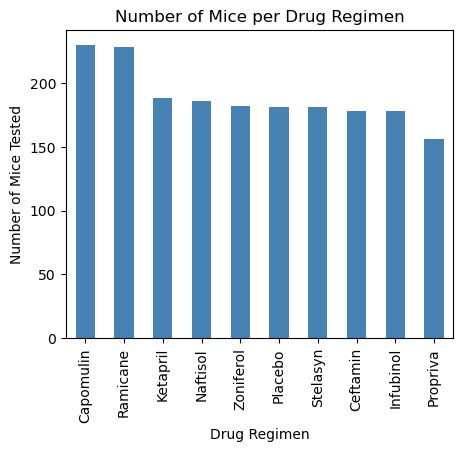

<Figure size 640x480 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_pd =  clean_df.groupby(['Drug Regimen']).count()['Timepoint'].sort_values(ascending=False)
bar_pd.plot(kind='bar', facecolor='steelblue', figsize=(5,4), title='Number of Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()
plt.tight_layout()

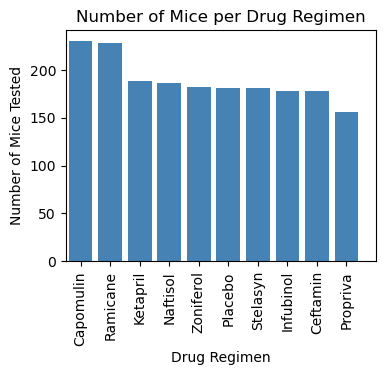

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y =  clean_df['Drug Regimen'].value_counts()
plt.figure(figsize=(4,3))
plt.bar(y.index.values, y.values, color='steelblue', align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title('Number of Mice per Drug Regimen')
plt.xlim(-0.5,10)
plt.xticks(rotation=90)
plt.show()

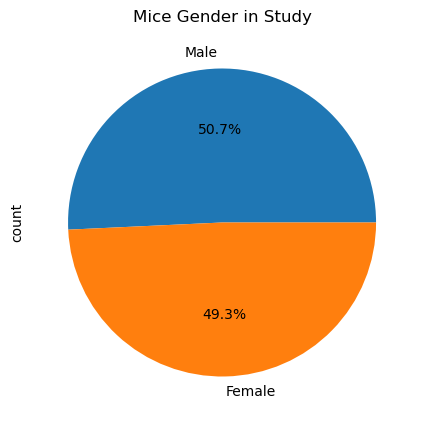

<Figure size 640x480 with 0 Axes>

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_pd =  clean_df['Sex'].value_counts()
pie_pd.plot(kind='pie', autopct='%1.1f%%', figsize=(6,5), title="Mice Gender in Study")
plt.show()
plt.tight_layout()

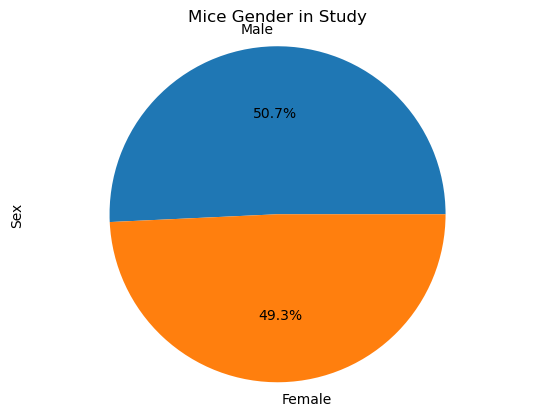

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_plt = clean_df['Sex'].value_counts()
plt.pie(pie_plt, labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title("Mice Gender in Study")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ramicane = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
infubinol = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceftamin = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
last_capo = capomulin.groupby('Mouse ID').max()['Timepoint']
last_rami = ramicane.groupby('Mouse ID').max()['Timepoint']
last_infu = infubinol.groupby('Mouse ID').max()['Timepoint']
last_ceft = ceftamin.groupby('Mouse ID').max()['Timepoint']
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
vol_capo = pd.DataFrame(last_capo)
capo_merge = pd.merge(vol_capo, clean_df, on=("Mouse ID", "Timepoint"), how="left")
vol_rami = pd.DataFrame(last_rami)
rami_merge = pd.merge(vol_rami, clean_df, on=("Mouse ID", "Timepoint"), how="left")
vol_infu = pd.DataFrame(last_infu)
infu_merge = pd.merge(vol_infu, clean_df, on=("Mouse ID", "Timepoint"), how="left")
vol_ceft = pd.DataFrame(last_ceft)
ceft_merge = pd.merge(vol_ceft, clean_df, on=("Mouse ID", "Timepoint"), how="left")

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    # add subset 
    
    # Determine outliers using upper and lower bounds
# Capomulin
capo_volume = capo_merge['Tumor Volume (mm3)']
capo_volume = capo_volume.astype('int64')
quartiles1 = capo_volume.quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
lowerbound1 = lowerq1 - (1.5*iqr1)
upperbound1 = upperq1 + (1.5*iqr1)
print(f"Capomulin Potential Outliers: Below: {lowerbound1} and Above: {upperbound1}.")

# Ramicane 
rami_volume = rami_merge['Tumor Volume (mm3)']
rami_volume = rami_volume.astype('int64')
quartiles2 = rami_volume.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2
lowerbound2 = lowerq2 - (1.5*iqr2)
upperbound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane Potential Outliers: Below: {lowerbound2} and Above: {upperbound2}.")

# Infubinol 
infu_volume = infu_merge['Tumor Volume (mm3)']
infu_volume = infu_volume.astype('int64')
quartiles3 = infu_volume.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3
lowerbound3 = lowerq3 - (1.5*iqr3)
upperbound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol Potential Outliers: Below: {lowerbound3} and Above: {upperbound3}.")

# Ceftamin 
ceft_volume = ceft_merge['Tumor Volume (mm3)']
ceft_volume = ceft_volume.astype('int64')
quartiles4 = ceft_volume.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4
lowerbound4 = lowerq4 - (1.5*iqr4)
upperbound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin Potential Outliers: Below: {lowerbound4} and Above: {upperbound4}.")

Capomulin Potential Outliers: Below: 20.0 and Above: 52.0.
Ramicane Potential Outliers: Below: 17.5 and Above: 53.5.
Infubinol Potential Outliers: Below: 37.5 and Above: 81.5.
Ceftamin Potential Outliers: Below: 24.0 and Above: 88.0.


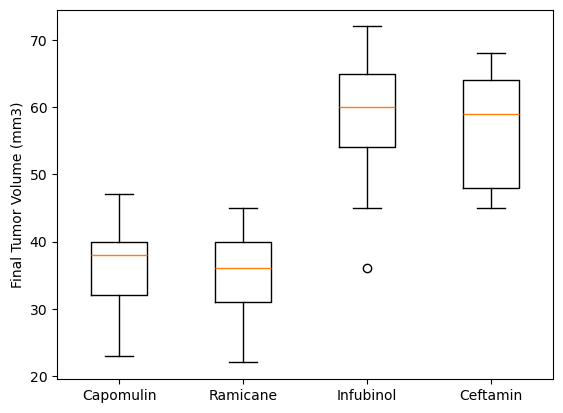

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_regimen = [capo_volume, rami_volume, infu_volume, ceft_volume]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(boxplot_regimen, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

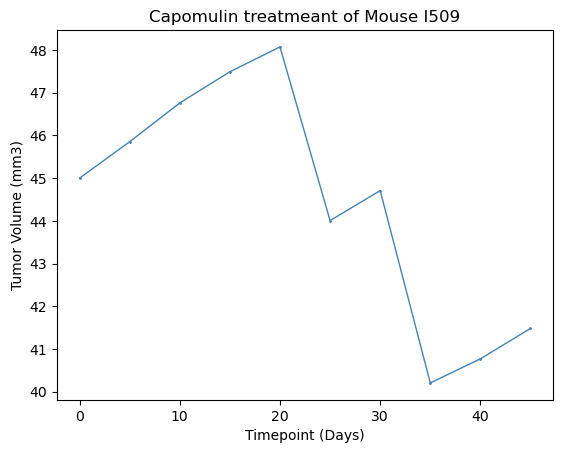

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = capomulin.loc[capomulin["Mouse ID"] == "l509",:]
line_tp = line_df['Timepoint'].unique()
tumorsiz = line_df['Tumor Volume (mm3)'].unique()
tumorsiz.astype('int64')
fig2, ax2 = plt.subplots()
plt.title('Capomulin treatmeant of Mouse I509')
plt.plot(line_tp, tumorsiz, linewidth=1, markersize=1,marker="o",color="steelblue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

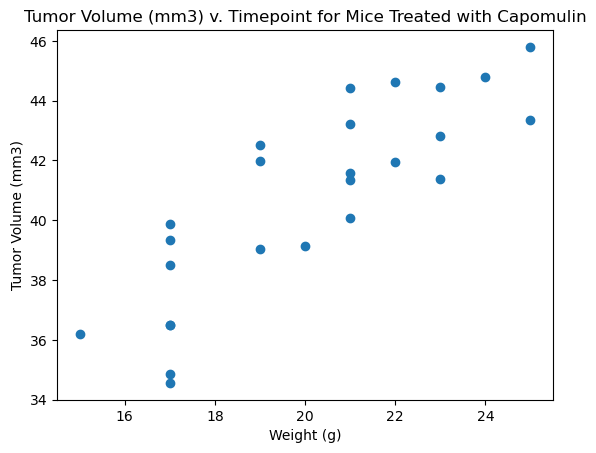

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_w = capomulin.groupby('Mouse ID')['Weight (g)'].mean()
average_tv = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
average_tv = average_tv.astype('float64')
plt.scatter(average_w, average_tv)
plt.title('Tumor Volume (mm3) v. Timepoint for Mice Treated with Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.7088568047708723


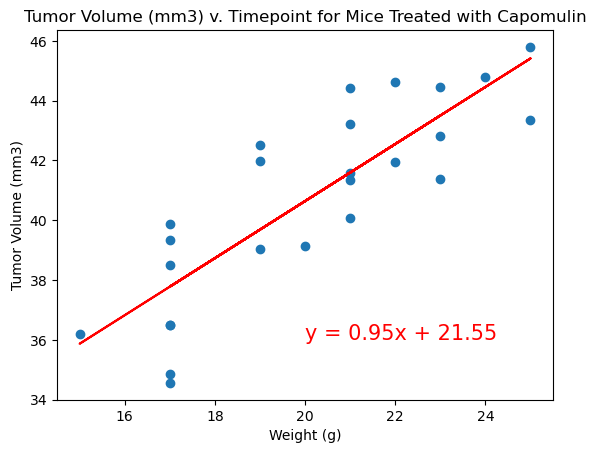

In [27]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(average_w, average_tv)
regress_values = average_w * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(average_w, average_tv)
plt.plot(average_w, regress_values, "r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title('Tumor Volume (mm3) v. Timepoint for Mice Treated with Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

print(f"The correlation between mouse weight and the average tumor volume is {rvalue**2}")
plt.show()